In [1]:
# Load necessary library
library(ggplot2)

# Read the data
data <- read.csv("Complete_Data_Modified.csv")

# Get column names except the first one (assuming it's an index or ID column)
column_names <- names(data)[-1]

# Loop through each column and create histograms
for (col in column_names) {
  # Create a histogram plot using ggplot2
  ggplot(data, aes_string(x = col)) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    labs(title = paste("Histogram of", col), x = col, y = "Frequency") +
    theme_minimal()
  
  # Save the plot as a PNG file
  ggsave(paste(col, "_histogram.png", sep = ""), width = 4, height = 4)
}


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


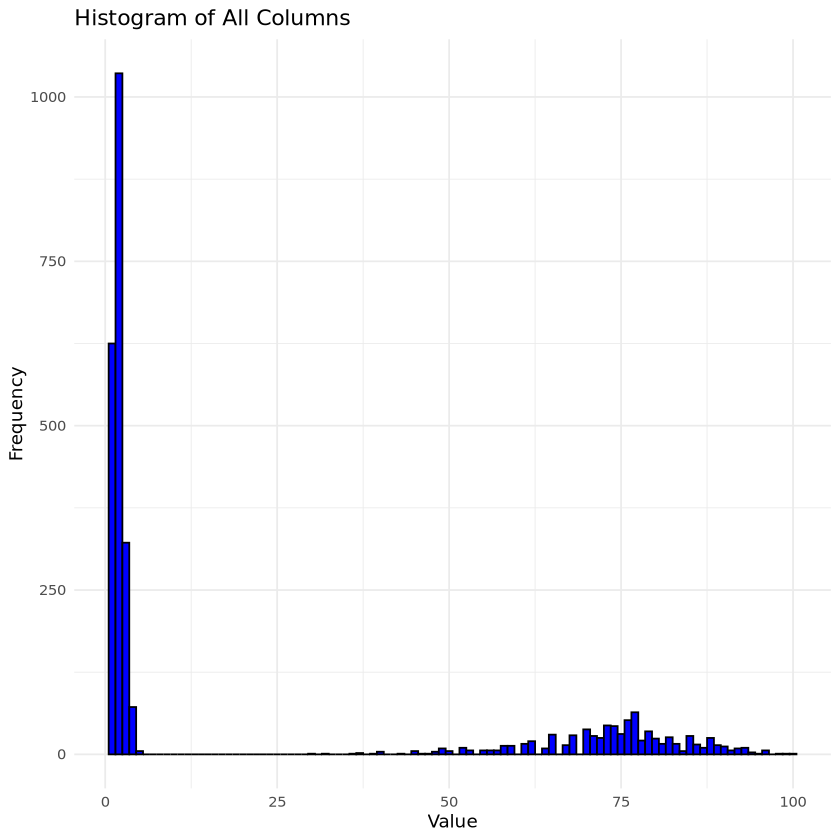

In [2]:
# Load necessary library
library(ggplot2)

# Read the data
data <- read.csv("Complete_Data_Modified.csv")

# Combine all column data into a single vector
all_data <- unlist(data)

# Create a histogram plot using ggplot2
ggplot() +
  geom_histogram(aes(x = all_data), binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Histogram of All Columns", x = "Value", y = "Frequency") +
  theme_minimal()

# Save the plot as "super.png"
ggsave("super.png", width = 8, height = 6)


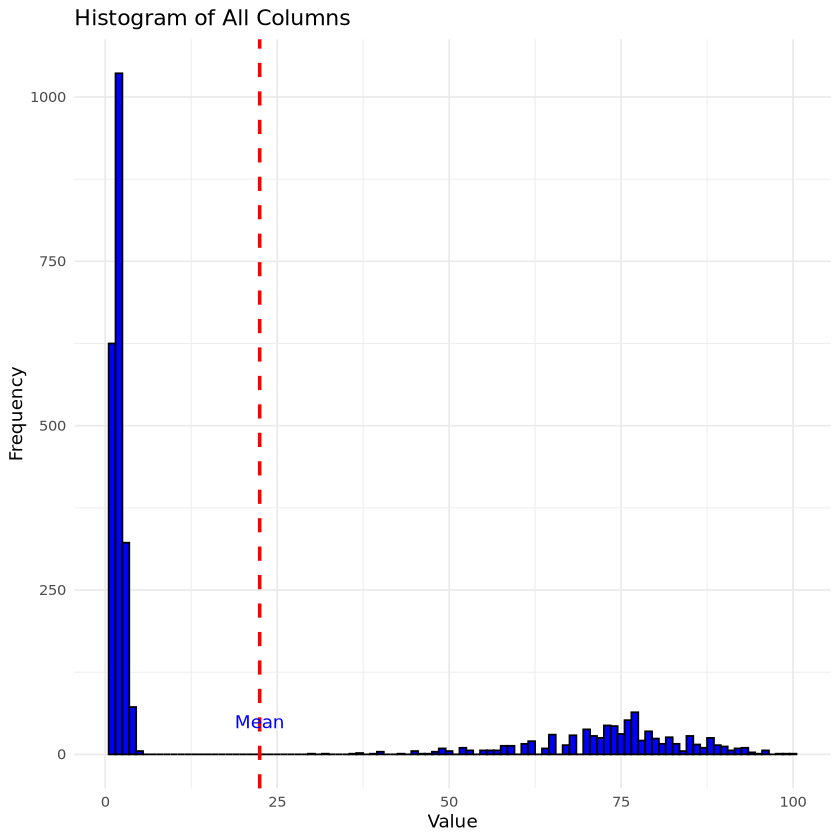

In [3]:
# Load necessary library
library(ggplot2)

# Read the data
data <- read.csv("Complete_Data_Modified.csv")

# Combine all column data into a single vector
all_data <- unlist(data)

# Create a histogram plot using ggplot2
ggplot() +
  geom_histogram(aes(x = all_data, fill = "All Columns"), binwidth = 1, color = "black") +
  geom_vline(aes(xintercept = mean(all_data), color = "Mean"), linetype = "dashed", linewidth = 1) +
  geom_text(aes(x = mean(all_data), y = 20, label = "Mean"), color = "blue", vjust = -1) +
  labs(title = "Histogram of All Columns", x = "Value", y = "Frequency") +
  scale_fill_manual(values = c("All Columns" = "blue")) +
  scale_color_manual(values = c("Mean" = "red")) +
  theme_minimal() +
  theme(legend.position = "none")

# Save the plot as "super.png"
ggsave("super2.png", width = 8, height = 6)


In [5]:
# Load necessary library
library(ggplot2)

# Read the data
data <- read.csv("Complete_Data_Modified.csv")

# Combine all column data into a single vector
all_data <- unlist(data)

# Create a histogram plot using ggplot2
hist_plot <- ggplot() +
  geom_histogram(aes(x = all_data, fill = "All Columns"), binwidth = 1, color = "black") +
  geom_vline(aes(xintercept = mean(all_data), color = "Mean"), linetype = "dashed", linewidth = 1) +
  geom_text(aes(x = mean(all_data), y = 20, label = "Mean"), color = "blue", vjust = -1) +
  labs(title = "Histogram of All Columns", x = "Value", y = "Frequency") +
  scale_fill_manual(values = c("All Columns" = "blue")) +
  scale_color_manual(values = c("Mean" = "red")) +
  theme_minimal() +
  theme(legend.position = "none")

# Create a new plot with labels on bars
hist_plot_with_labels <- hist_plot +
  geom_text(
    data = data.frame(x = mean(all_data), label = "Mean"),
    aes(x = x, y = 20, label = label),
    color = "blue", vjust = -1
  ) +
  geom_text(
    data = data.frame(x = unique(all_data), label = as.character(unique(all_data))),
    aes(x = x, y = 5, label = label),
    position = position_stack(vjust = 0.5),
    show.legend = FALSE
  )

# Save the plot as "super_with_labels.png"
ggsave("super_with_labels.png", hist_plot_with_labels, width = 8, height = 6)


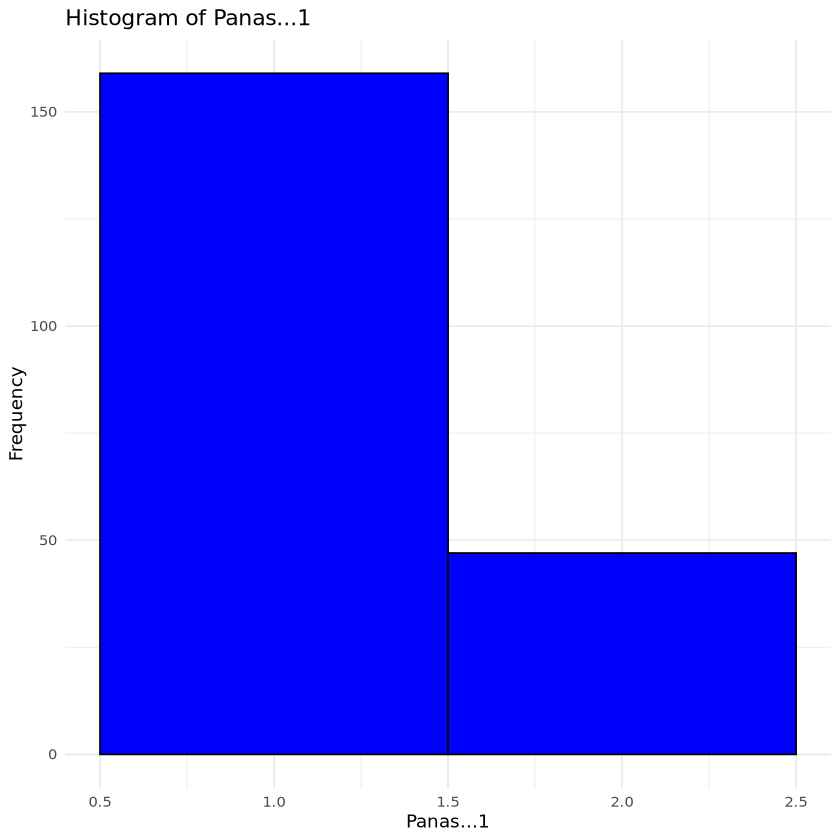

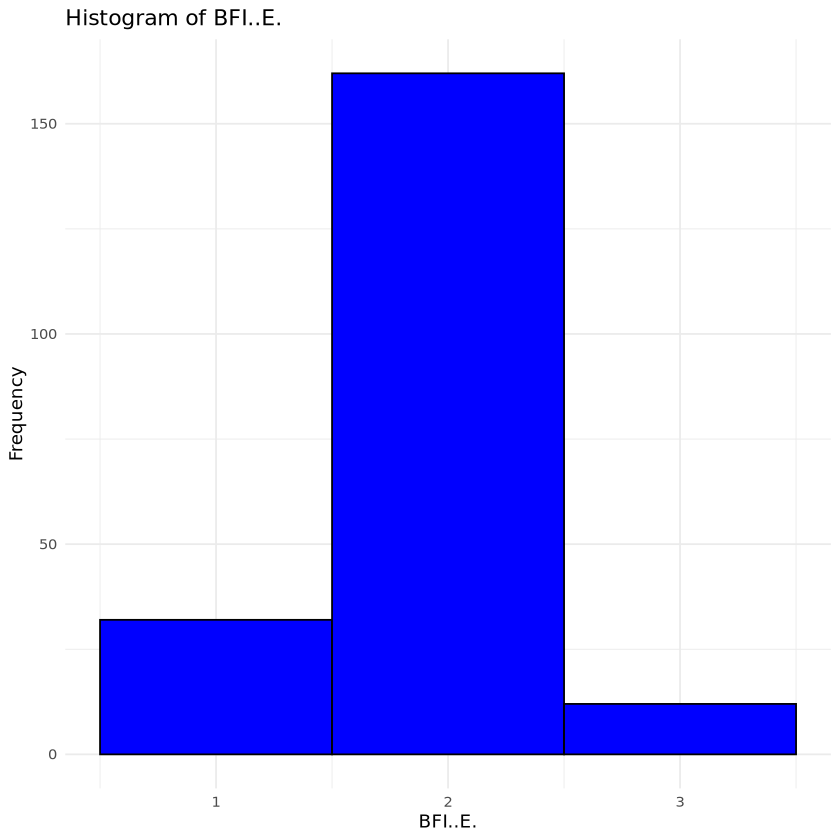

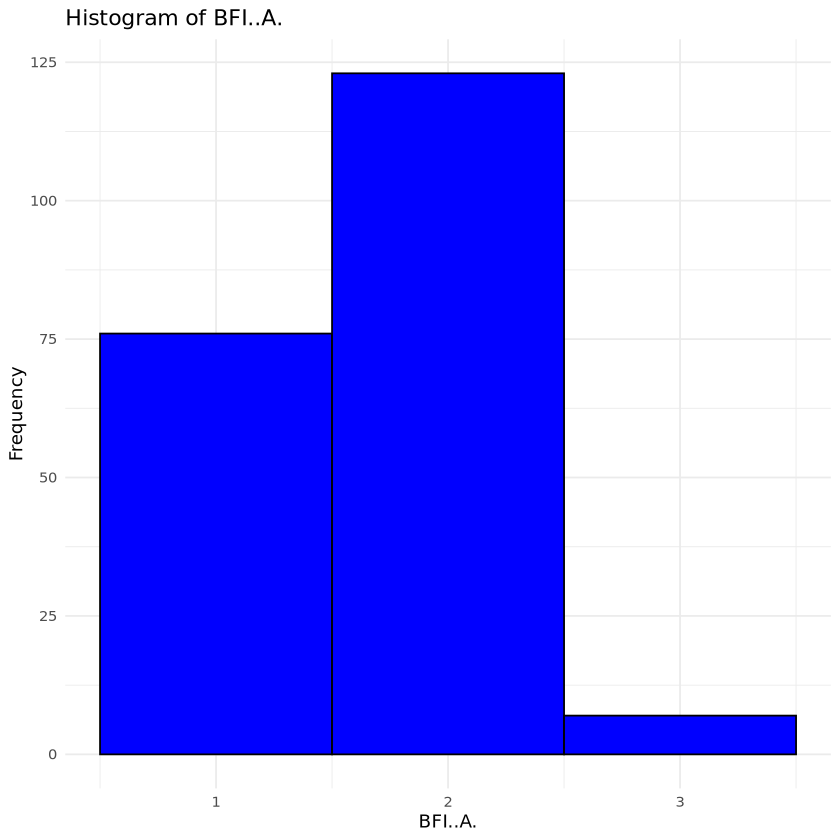

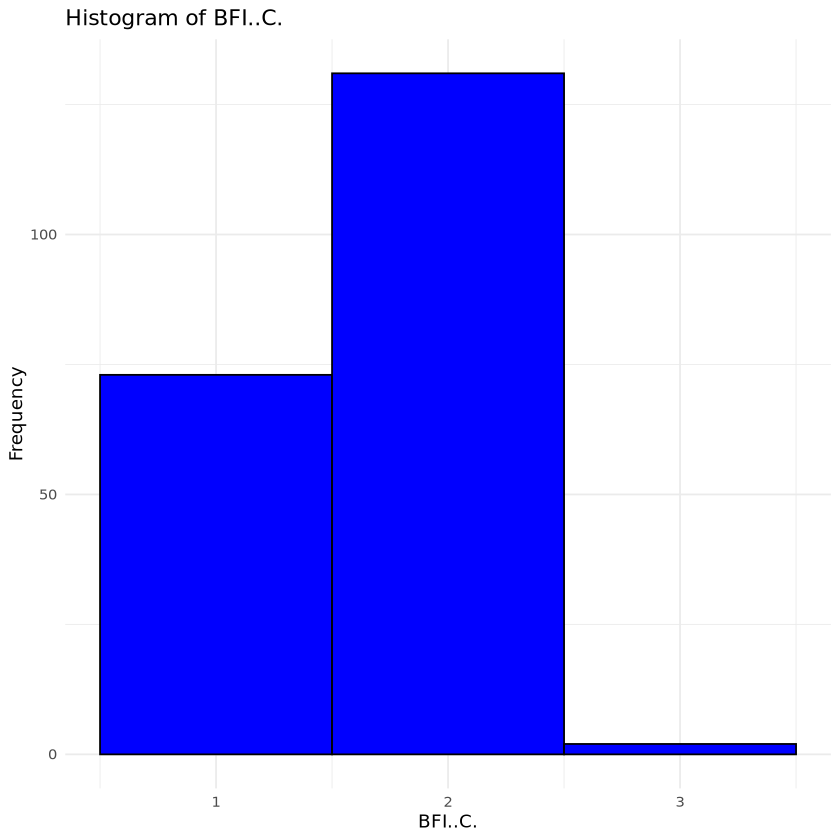

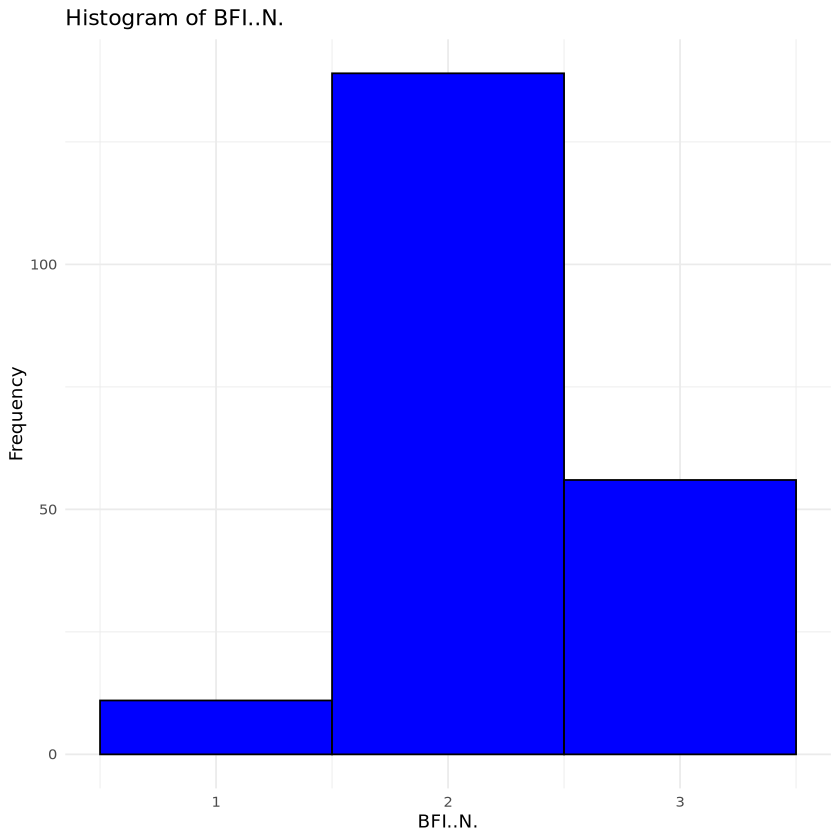

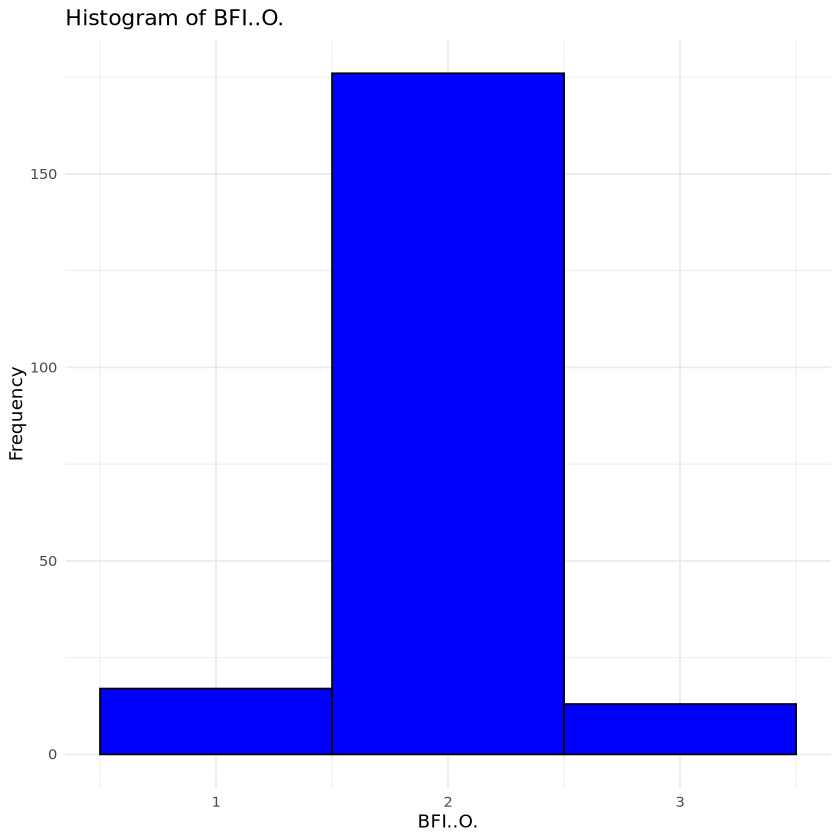

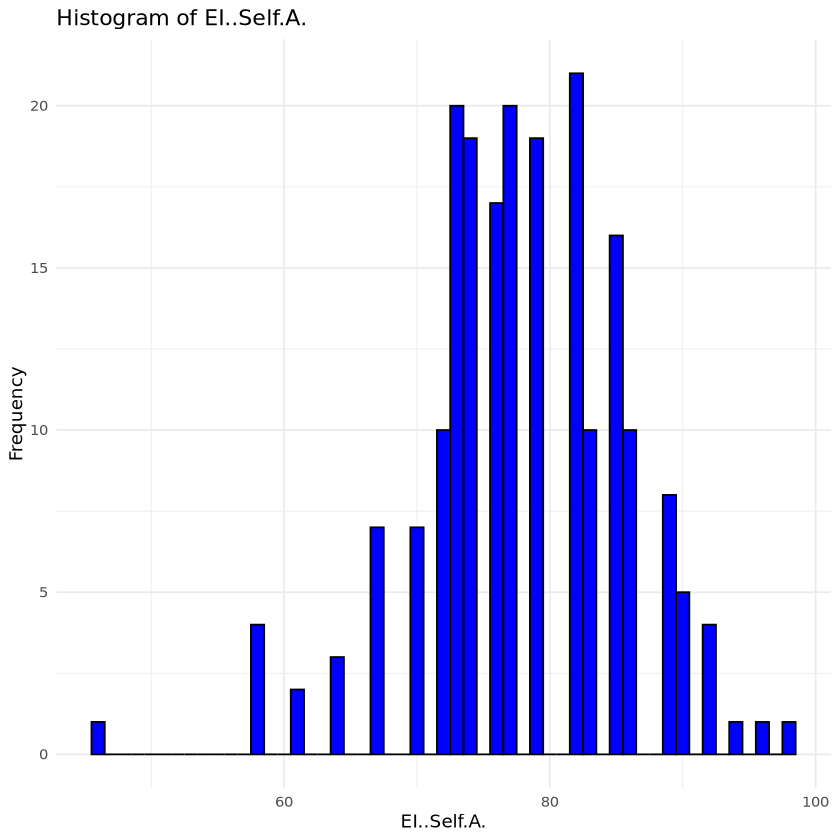

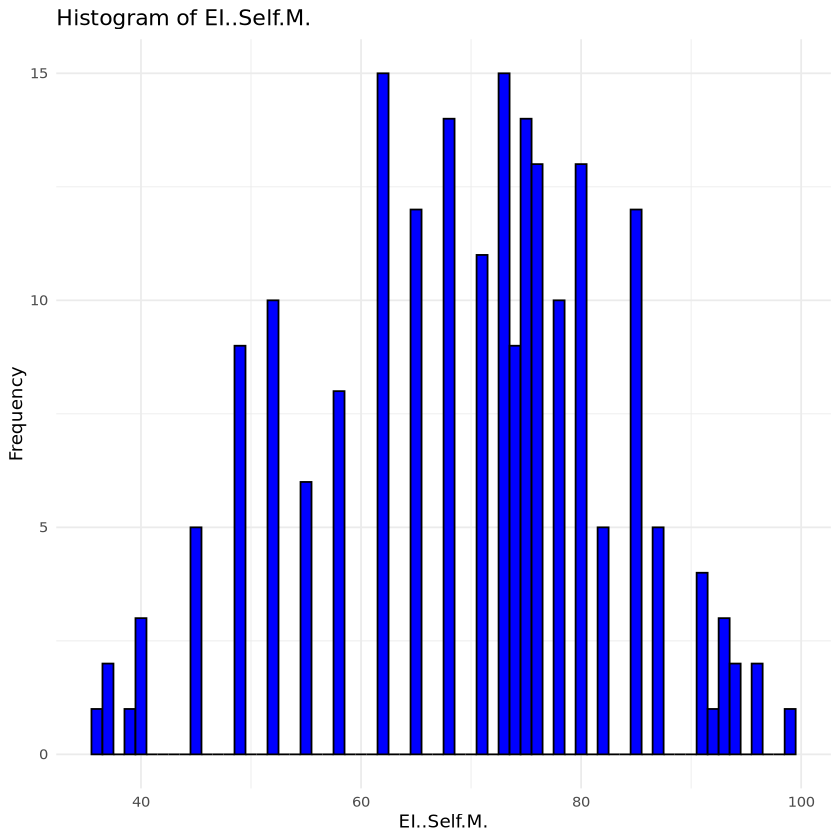

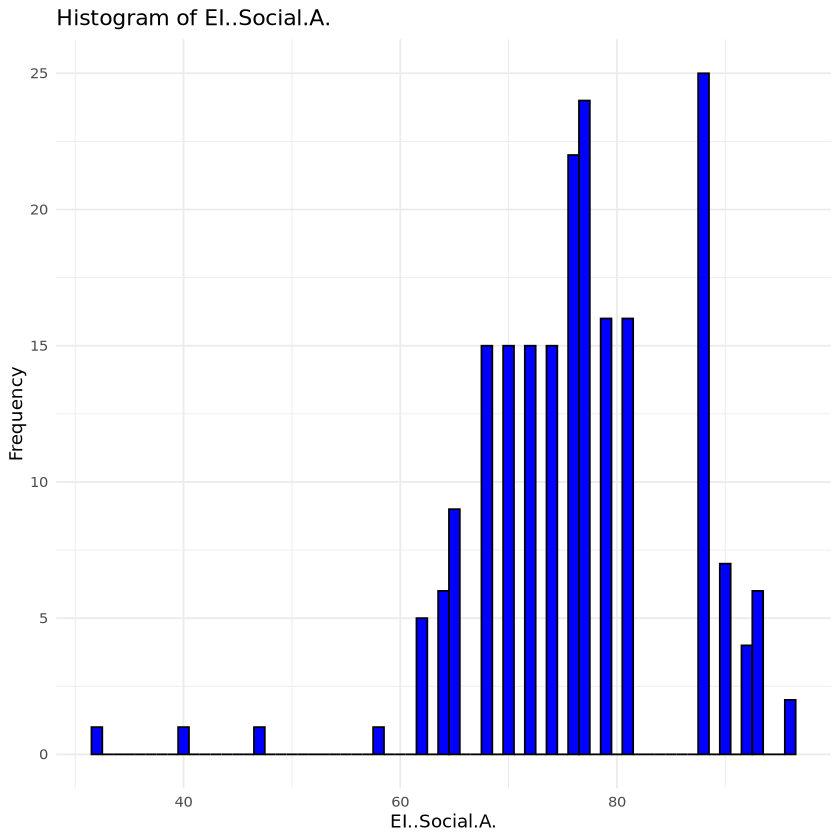

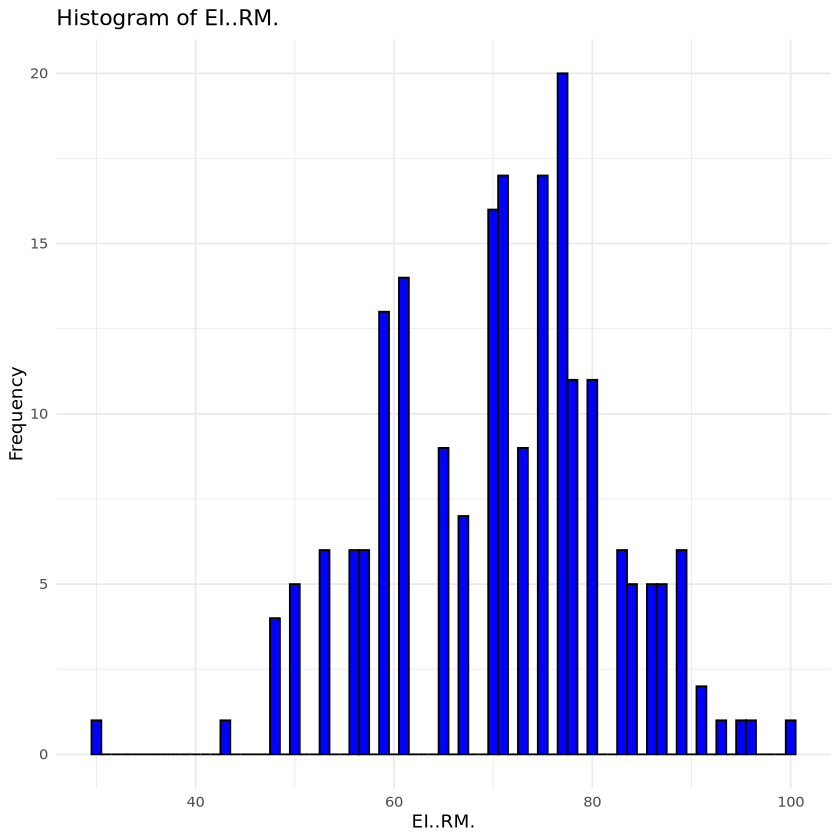

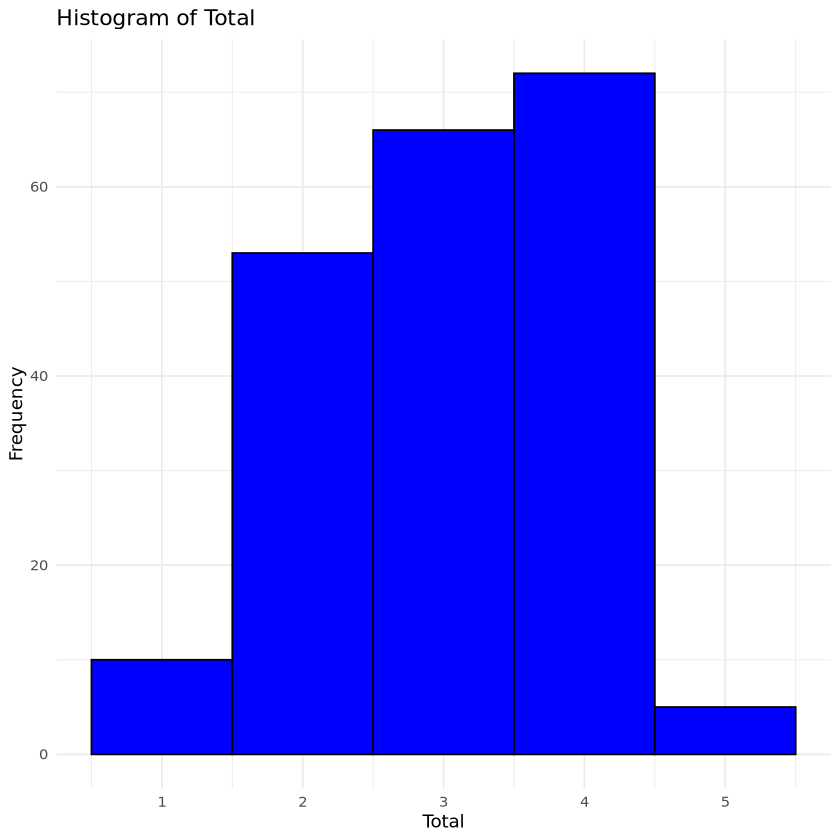

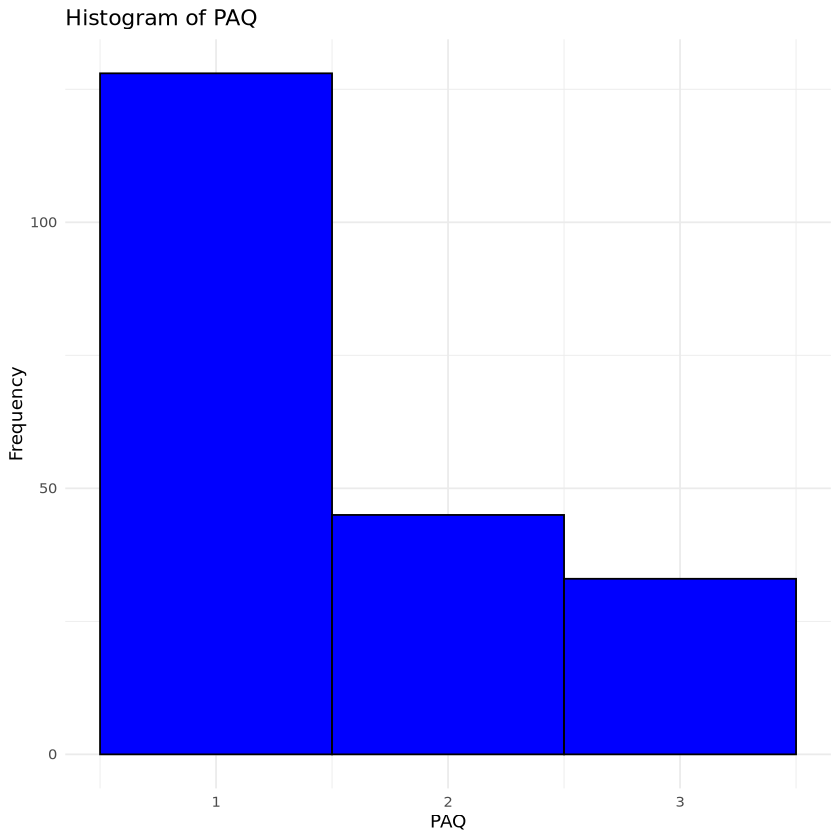

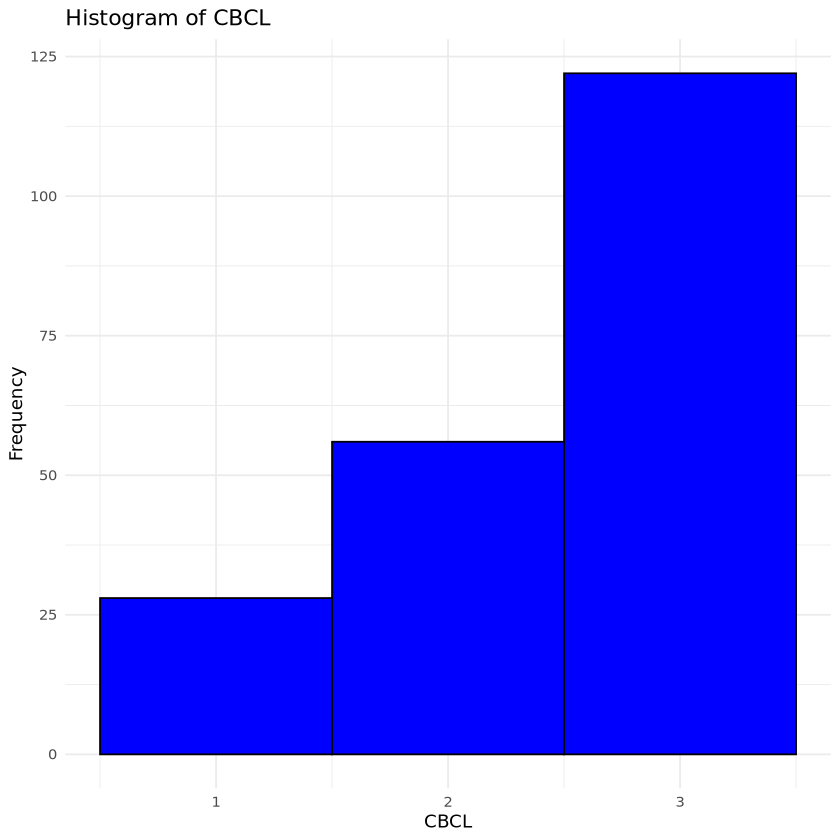

In [6]:
# Load necessary library
library(ggplot2)

# Read the data
data <- read.csv("Complete_Data_Modified.csv")

# Get column names except the first one (assuming it's an index or ID column)
column_names <- names(data)[-1]

# Loop through each column and create histograms
for (col in column_names) {
  # Create a histogram plot using ggplot2
  histogram <- ggplot(data, aes_string(x = col)) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    labs(title = paste("Histogram of", col), x = col, y = "Frequency") +
    theme_minimal()
  
  # Display the histogram
  print(histogram)
  
  # Save the plot as a PNG file
  ggsave(paste(col, "_histogram.png", sep = ""), histogram, width = 4, height = 4)
}



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




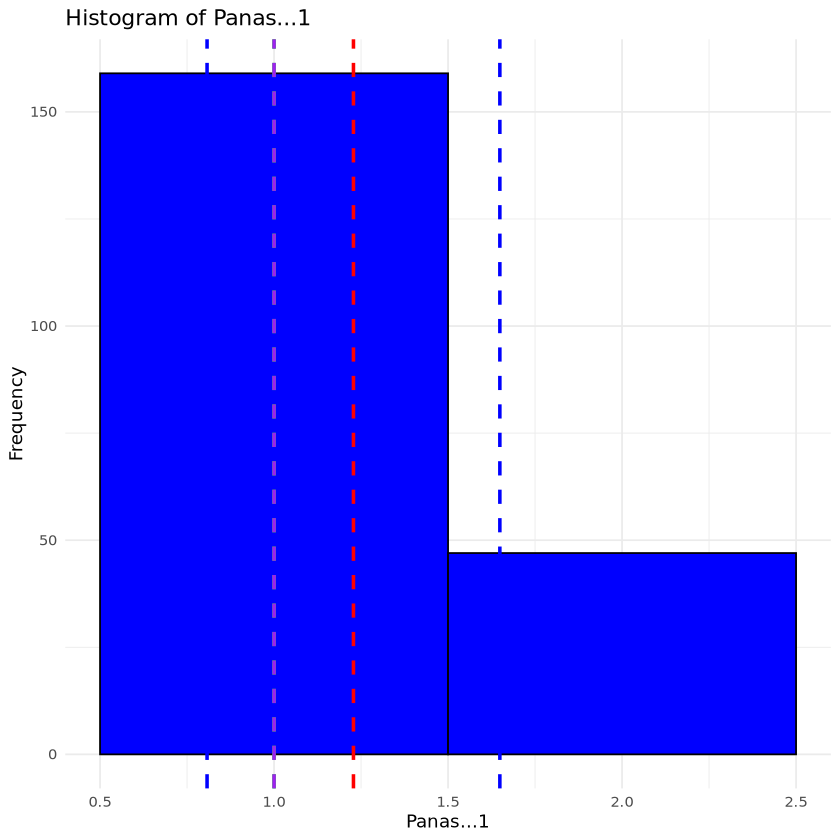

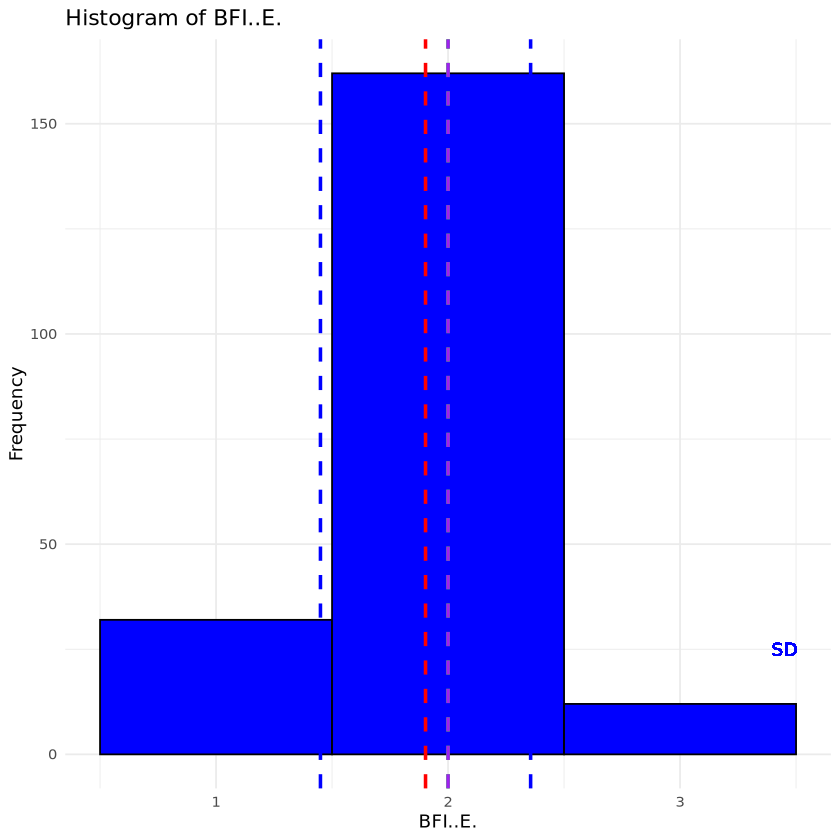

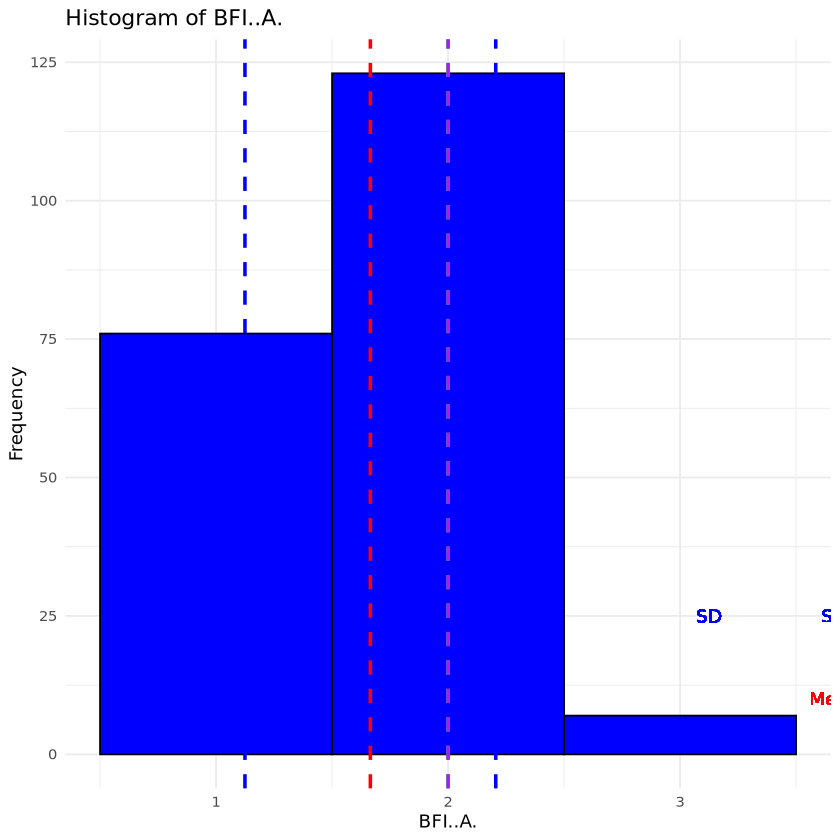

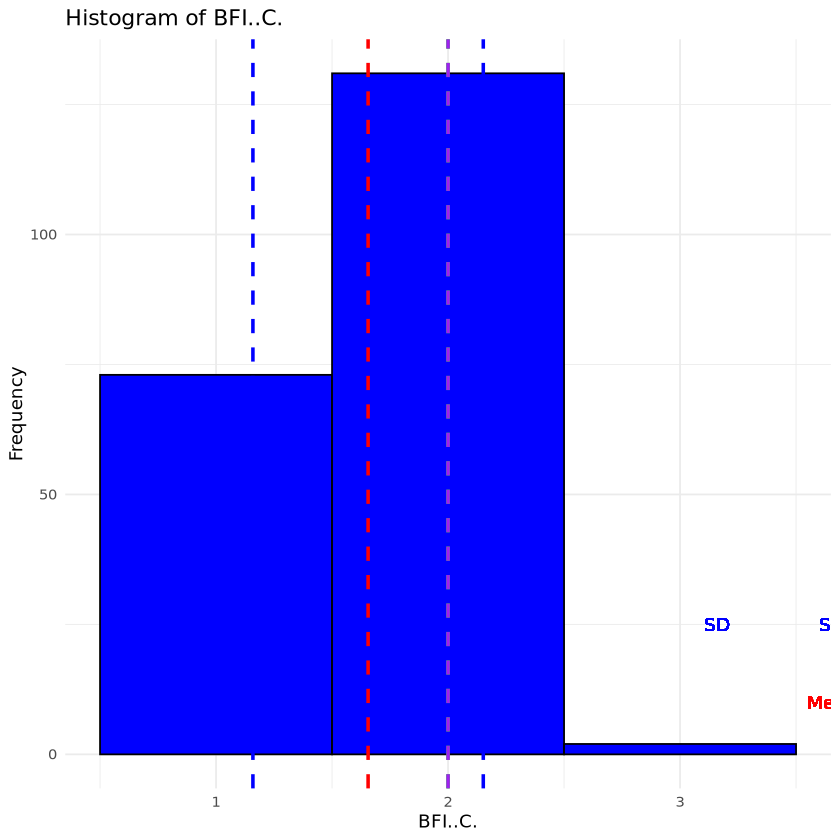

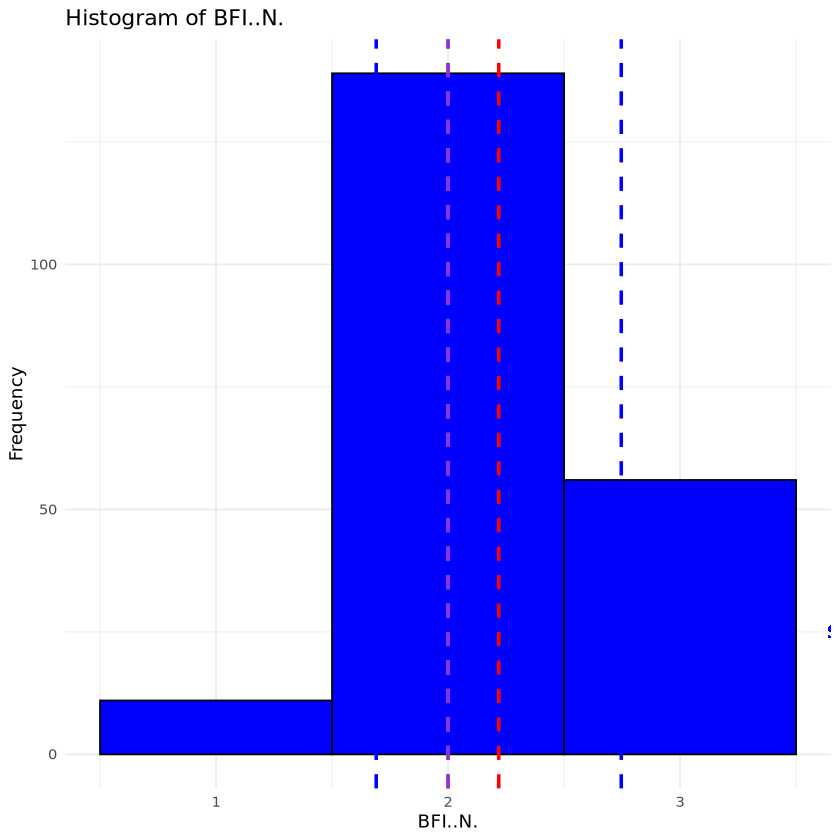

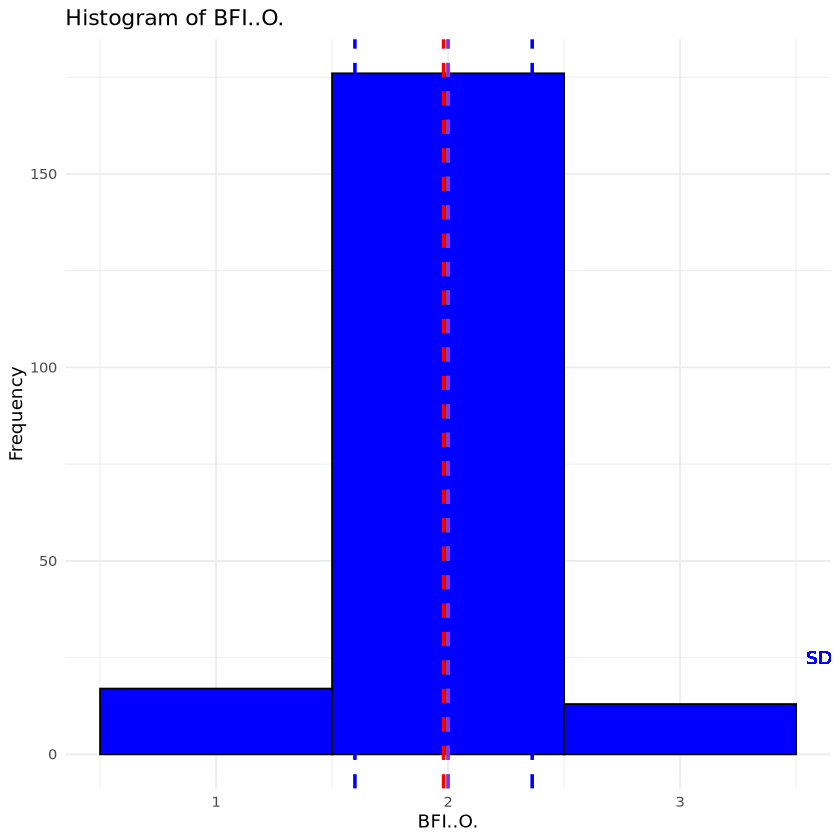

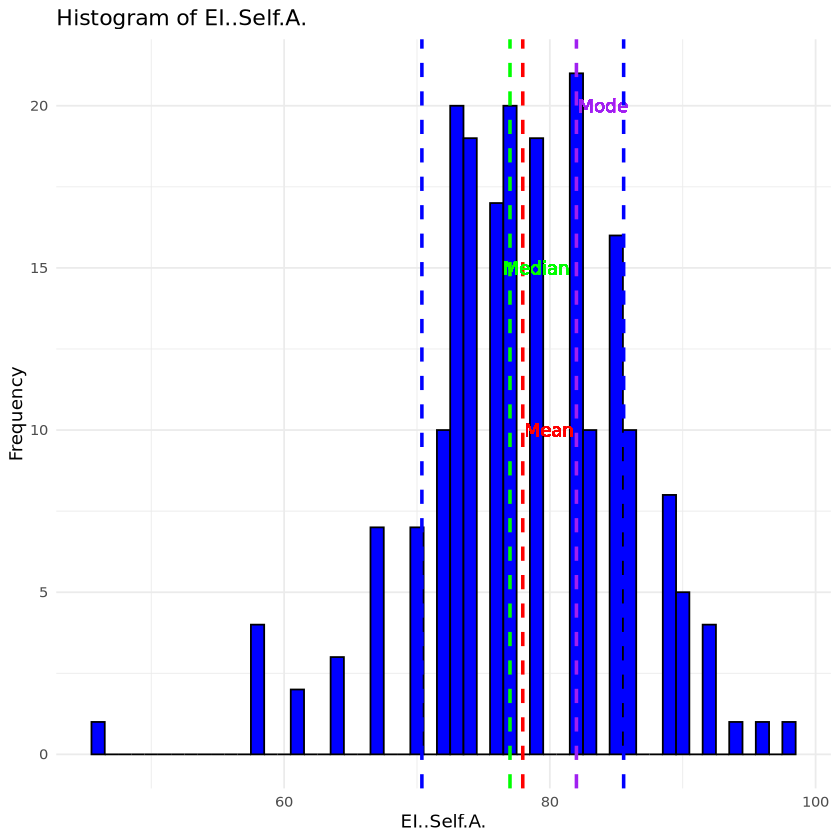

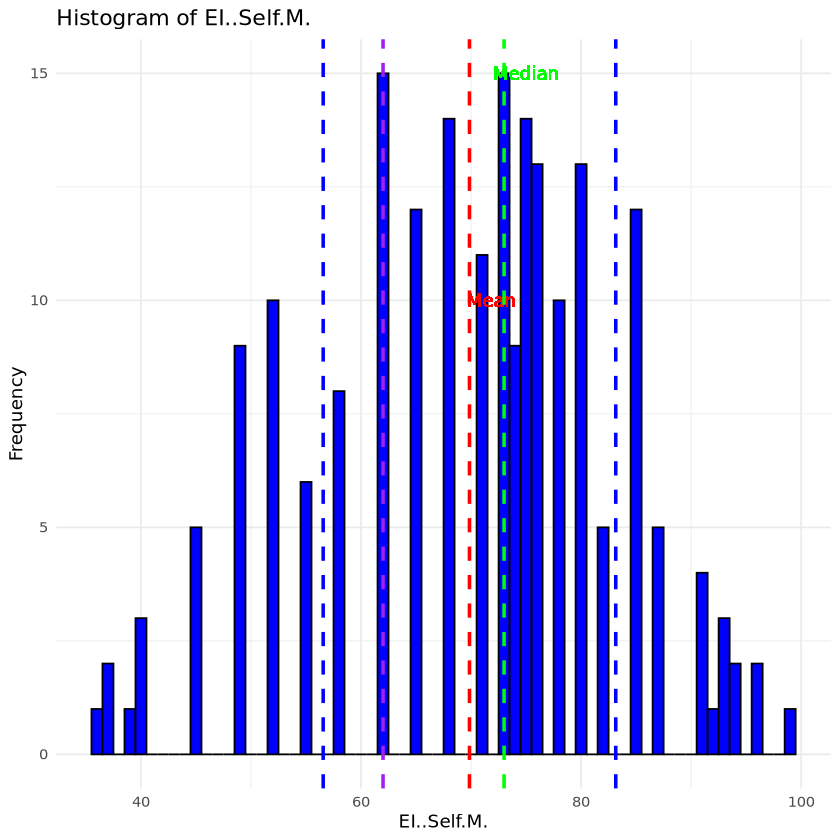

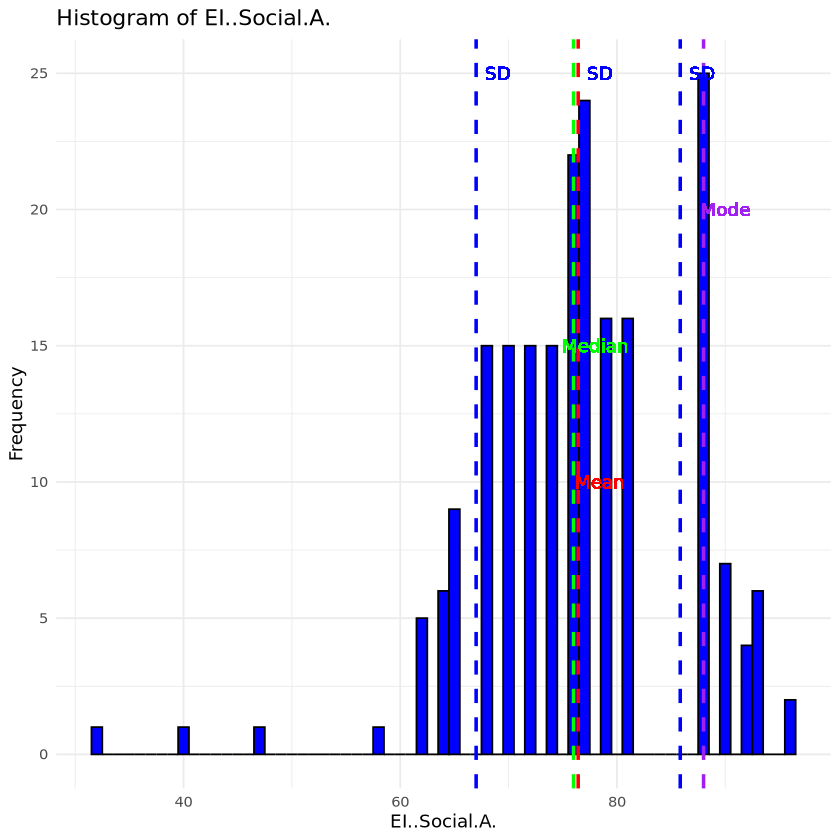

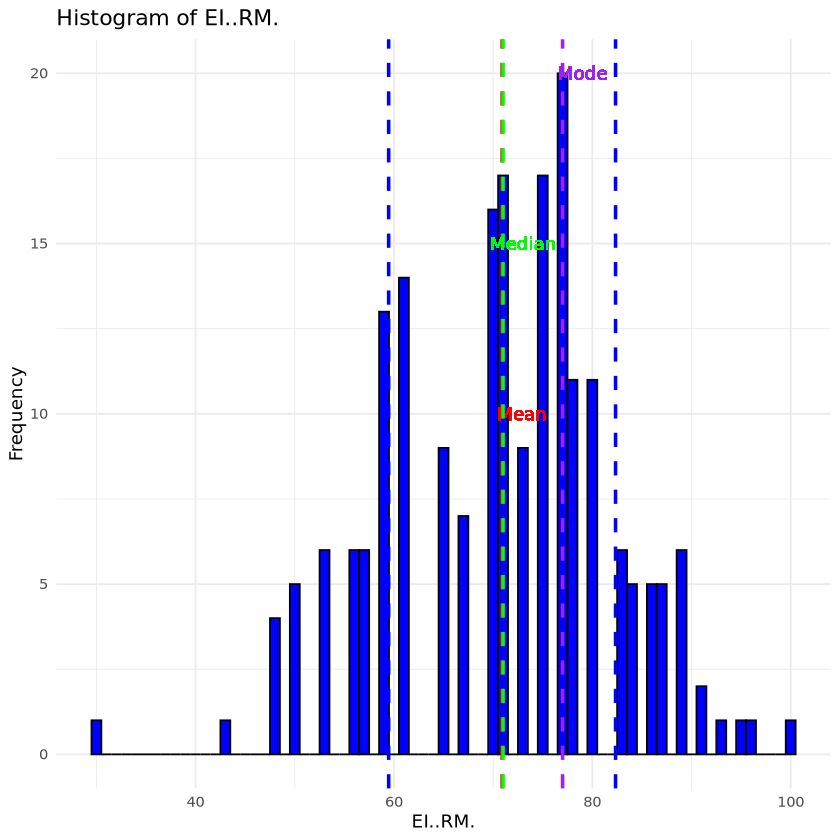

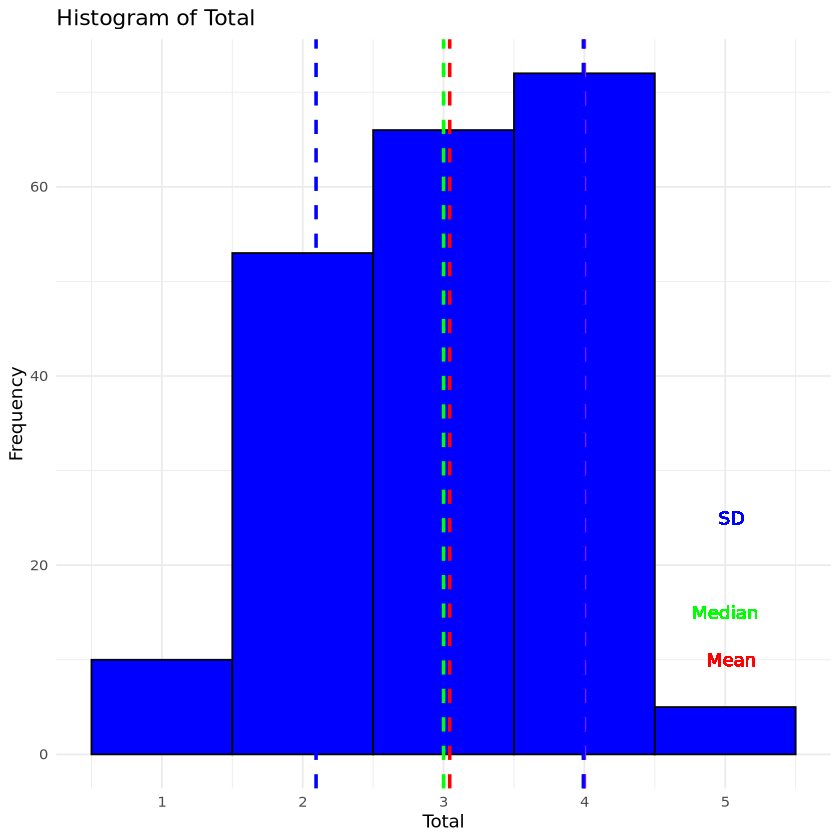

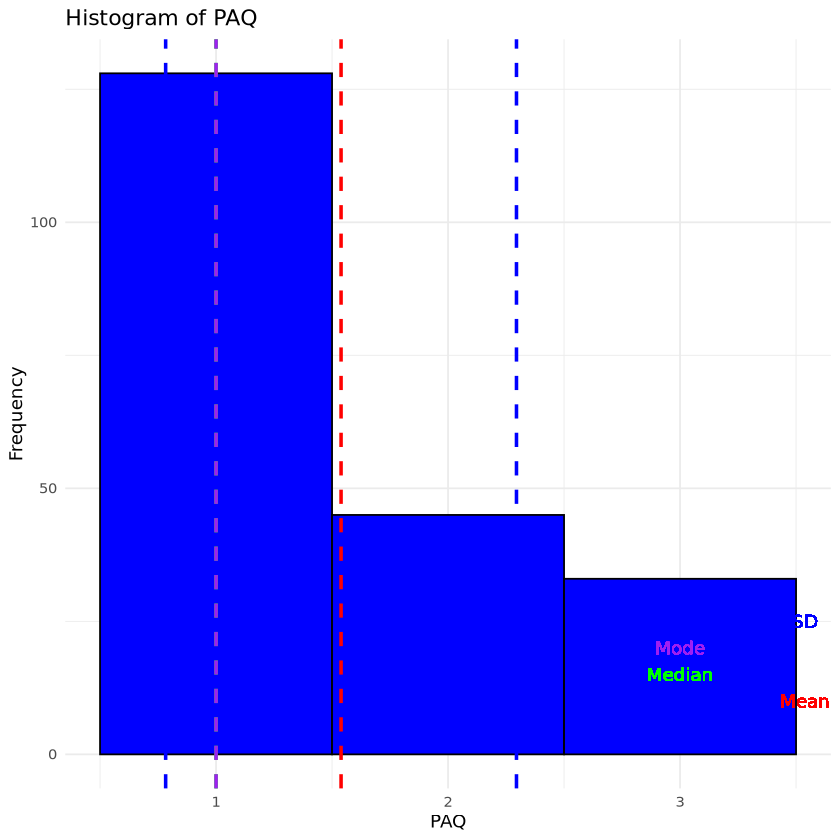

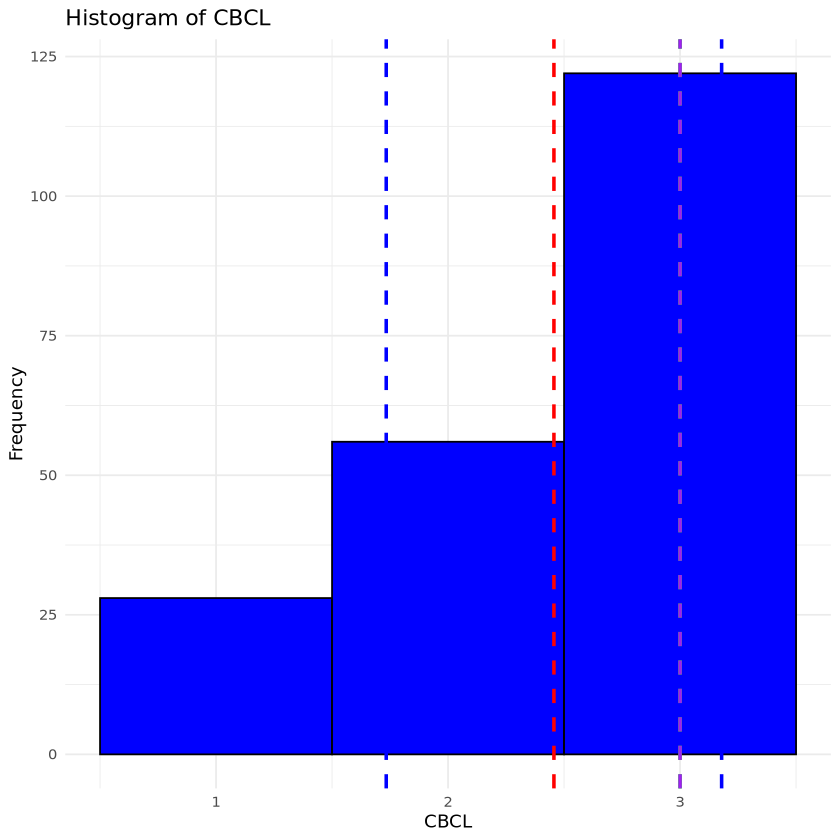

In [7]:
# Load necessary library
library(ggplot2)
library(dplyr)

# Read the data
data <- read.csv("Complete_Data_Modified.csv")

# Get column names except the first one (assuming it's an index or ID column)
column_names <- names(data)[-1]

# Loop through each column and create histograms
for (col in column_names) {
  # Calculate summary statistics
  col_mean <- mean(data[[col]])
  col_median <- median(data[[col]])
  col_mode <- as.numeric(names(sort(table(data[[col]]), decreasing = TRUE)[1]))
  col_sd <- sd(data[[col]])
  
  # Create a histogram plot using ggplot2
  histogram <- ggplot(data, aes_string(x = col)) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    labs(title = paste("Histogram of", col), x = col, y = "Frequency") +
    theme_minimal() +
    geom_vline(aes(xintercept = col_mean), color = "red", linetype = "dashed", size = 1) +
    geom_text(aes(label = "Mean"), x = col_mean + 2, y = 10, color = "red") +
    geom_vline(aes(xintercept = col_median), color = "green", linetype = "dashed", size = 1) +
    geom_text(aes(label = "Median"), x = col_median + 2, y = 15, color = "green") +
    geom_vline(aes(xintercept = col_mode), color = "purple", linetype = "dashed", size = 1) +
    geom_text(aes(label = "Mode"), x = col_mode + 2, y = 20, color = "purple") +
    geom_vline(aes(xintercept = col_mean + col_sd), color = "blue", linetype = "dashed", size = 1) +
    geom_vline(aes(xintercept = col_mean - col_sd), color = "blue", linetype = "dashed", size = 1) +
    geom_text(aes(label = "SD"), x = col_mean + 2, y = 25, color = "blue") +
    geom_text(aes(label = "SD"), x = col_mean + col_sd + 2, y = 25, color = "blue") +
    geom_text(aes(label = "SD"), x = col_mean - col_sd + 2, y = 25, color = "blue")
  
  # Display the histogram
  print(histogram)
  
  # Save the plot as a PNG file
  ggsave(paste(col, "_histogram.png", sep = ""), histogram, width = 6, height = 6)
}
